In [ ]:
#pip install yfinance

In [3]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [4]:
# Grab data
tickers = ['META','AMZN','AAPL','NFLX','GOOG','NVDA','TSLA']
df = yf.download(tickers)

[*********************100%***********************]  7 of 7 completed


In [5]:
# Data with the adjusted close
df = df['Adj Close'].dropna()

In [6]:
# First data 
df.head()

Ticker,AAPL,AMZN,GOOG,META,NFLX,NVDA,TSLA
Date,,,,,,,
2012-05-18 00:00:00+00:00,15.996176,10.6925,14.917315,38.115242,9.994286,0.276979,1.837333
2012-05-21 00:00:00+00:00,16.928114,10.9055,15.257948,33.927845,10.248571,0.281794,1.918000
2012-05-22 00:00:00+00:00,16.798122,10.7665,14.927253,30.906942,9.672857,0.278354,2.053333
2012-05-23 00:00:00+00:00,17.207994,10.8640,15.142416,31.903940,10.272857,0.285233,2.068000
2012-05-24 00:00:00+00:00,17.049957,10.7620,14.998312,32.930847,10.038571,0.277667,2.018667


In [7]:
# End data
df.tail()

Ticker,AAPL,AMZN,GOOG,META,NFLX,NVDA,TSLA
Date,,,,,,,
2024-09-16 00:00:00+00:00,216.320007,184.889999,158.990005,533.280029,696.500000,116.779999,226.779999
2024-09-17 00:00:00+00:00,216.789993,186.880005,160.279999,536.320007,706.909973,115.589996,227.869995
2024-09-18 00:00:00+00:00,220.690002,186.429993,160.809998,537.950012,690.469971,113.370003,227.199997
2024-09-19 00:00:00+00:00,228.869995,189.869995,163.240005,559.099976,704.320007,117.870003,243.919998
2024-09-20 00:00:00+00:00,228.199997,191.600006,164.639999,561.349976,701.030029,116.000000,238.250000


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

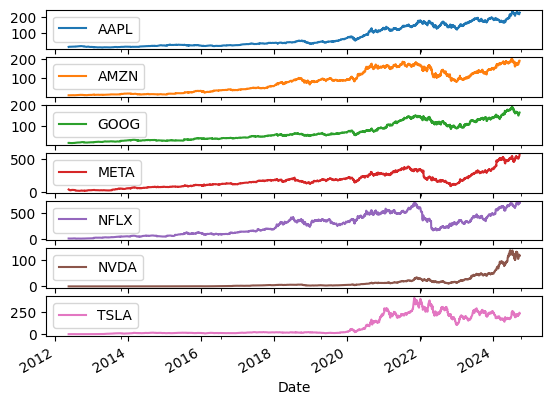

In [9]:
# Visualization : co-integrated 
df.plot(subplots=True)

In [10]:
# Tendency to move together
# We can now do a granger co-integration test
# It mean establish the presence of statistically significant connection  between two or more time series
def coint_test(df, alpha=0.05):
    """
    Cointegration Test and report
    
    """
    out = coint_johansen(df, -1, 5) 
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    
    def adjust(val, length=6):
        return str(val).ljust(length)
    
    print("Name\t||\t Test Stat > C(95%)\t=>Signif\t\n", '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), "|| ", adjust(round(trace,2), 9), ">", 
              adjust(cvt, 8)," => ", trace > cvt)

In [11]:
coint_test(df)

Name	||	 Test Stat > C(95%)	=>Signif	
 ----------------------------------------
AAPL   ||  139.94    > 111.7797  =>  True
AMZN   ||  91.14     > 83.9383   =>  True
GOOG   ||  53.67     > 60.0627   =>  False
META   ||  30.75     > 40.1749   =>  False
NFLX   ||  18.32     > 24.2761   =>  False
NVDA   ||  6.83      > 12.3212   =>  False
TSLA   ||  0.0       > 4.1296    =>  False
